In [8]:
!pip install git+https://github.com/rougier/matplotlib-3d
import sys
sys.path.append('./MAGICC/')

from magicc.plot_relief import Surface
from magicc.border_definition import get_boundary, get_neighbours_from_tris
import nibabel as nb
import matplotlib.pyplot as plt
from mpl3d.camera import Camera
import os
import numpy as np

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/rougier/matplotlib-3d to /tmp/pip-req-build-r9_h08bv
  Running command git clone -q https://github.com/rougier/matplotlib-3d /tmp/pip-req-build-r9_h08bv
  Created wheel for mpl3d: filename=mpl3d-0.0.1-py3-none-any.whl size=11664 sha256=849e6dbd800810e010b91f0e9c3783a5cf2249d669ef42ebdfbf6d46d0845bca
  Stored in directory: /tmp/pip-ephem-wheel-cache-4rmeuq43/wheels/17/31/25/e0e197d24361a9146d5b71402af7baa2a95df619b737bb7d92
Successfully built mpl3d


In [16]:
#import data
surf=nb.load(os.path.join('magicc_expression_data',
                          'fs_LR.32k.L.flat.surf.gii'))
parcellation=nb.load(os.path.join('magicc_expression_data','Glasser_2016.32k.L.label.gii'))
cortex=parcellation.darrays[0].data>0
concat = np.load('magicc_expression_data/ahba_vertex.npy')
mean_z = np.mean(np.abs(concat),axis=0)

In [18]:
#define central sulcus for visual guide
m1='L_4_ROI'
s1 = 'L_3a_ROI'
neighbours = get_neighbours_from_tris(surf.darrays[1].data)
central_sulcus_verts = get_boundary(m1,s1,neighbours,parcellation)
central_sulcus = np.zeros(len(cortex),dtype=bool)
central_sulcus[central_sulcus_verts] = True

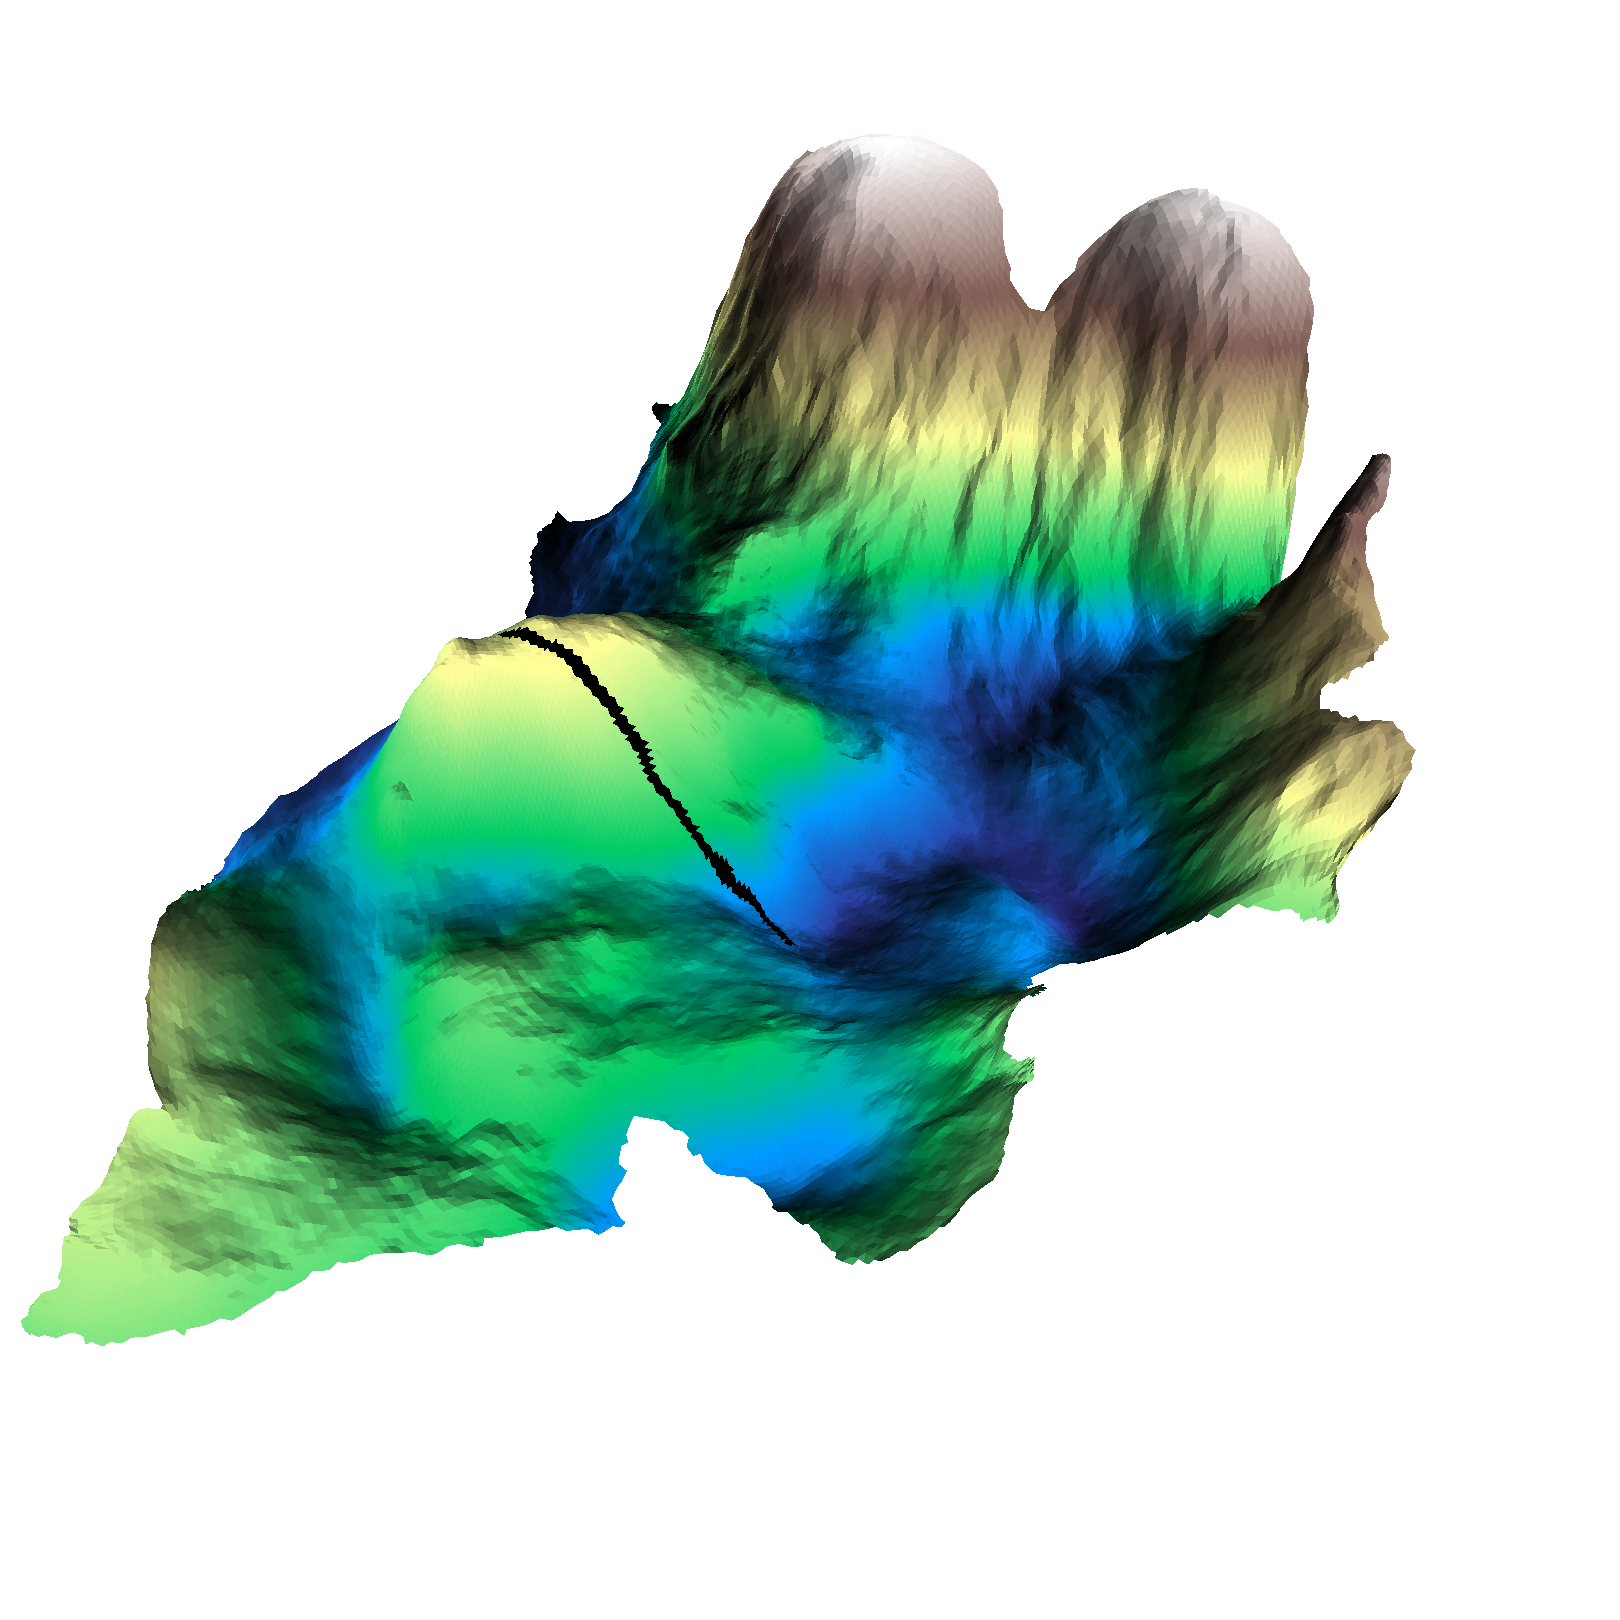

In [19]:
#plot surface relief map

vertices=surf.darrays[0].data
faces=surf.darrays[1].data
vertices[:,2]=mean_z*200
vertices=vertices/np.max(vertices)
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0,0,1,1], 
                  xlim=[-1.5,+1.5], 
                  ylim=[-1,+2], 
                  aspect=1)
ax.axis("off")
camera = Camera("perspective", 35, 300, scale=1.25)
cmap = plt.get_cmap("terrain")
Z=(mean_z-np.min(mean_z[mean_z>0]))/(np.max(mean_z)-np.min(mean_z[mean_z>0]))
Z=np.clip(Z,0,1)
facecolors = cmap(Z)
facecolors[central_sulcus]=np.array([0,0,0,1])
surface = Surface(ax, camera.transform, 0.3*mean_z,vertices=vertices,faces=faces, mode="all",
                  facecolors=facecolors, linewidths=0)
camera.connect(ax, surface.update)
